In [0]:
import warnings
warnings.filterwarnings(action='ignore')

In [0]:
import os
import sys
import os.path as Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# Reproducibility
seed = 18
np.random.seed(seed)

In [4]:
# mount gdrive and unzip data
try:
  from google.colab import drive
  drive.mount('/content/gdrive')
  project_dir = '/content/gdrive/My Drive/Colab_projects/PersonAttribures'
except:
  project_dir = '..'
print(Path.abspath(project_dir))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab_projects/PersonAttribures


In [0]:
if Path.exists(project_dir):
    # os.chdir(Path.join(project_dir)) 
    data_dir = Path.join(project_dir,'data')
    url = Path.join(data_dir,'interim','colab_preprocessed_data.csv')

In [6]:
os.getcwd()

'/content'

In [7]:
try:
    df = pd.read_csv(url)
except:
    print('File not found')
    raise
df.head(2)

,image_path,gender_female,gender_male,imagequality_Average,imagequality_Bad,imagequality_Good,age_15-25,age_25-35,age_35-45,age_45-55,age_55+,weight_normal-healthy,weight_over-weight,weight_slightly-overweight,weight_underweight,carryingbag_Daily/Office/Work Bag,carryingbag_Grocery/Home/Plastic Bag,carryingbag_None,footwear_CantSee,footwear_Fancy,footwear_Normal,emotion_Angry/Serious,emotion_Happy,emotion_Neutral,emotion_Sad,bodypose_Back,bodypose_Front-Frontish,bodypose_Side
0,/content/gdrive/My Drive/Colab_projects/Person...,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,/content/gdrive/My Drive/Colab_projects/Person...,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0


In [8]:
# df = df[:500]
df.shape

(13573, 28)

In [9]:
df.shape

(13573, 28)

In [10]:
# from IPython.display import Image
# Image(df.image_path[0])
Path.isfile(df.image_path[0])

False

In [0]:
src_dir = Path.join(project_dir, 'src')
data_scripts_dir = Path.join(src_dir, 'data_scripts')

In [12]:
Path.abspath(src_dir)

'/content/gdrive/My Drive/Colab_projects/PersonAttribures/src'

In [0]:
import sys  
sys.path.insert(0, Path.abspath(src_dir))

In [0]:
# drive.mount("/content/gdrive", force_remount=True)
%tensorflow_version 1.x 

In [15]:
from data_scripts.custom_data_gen_colab import PersonDataGenerator

Using TensorFlow backend.


In [0]:
from data_scripts.aug_functions import blur_cutout, get_random_eraser

In [17]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.15, random_state=18)
train_df.shape, val_df.shape

((11537, 28), (2036, 28))

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images are rescaled during batch generation
orig = ImageDataGenerator(rescale=1/255.0)
train_aug1 = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True, brightness_range=[0.2,0.8], channel_shift_range=100, preprocessing_function=get_random_eraser)
# train_aug1 = ImageDataGenerator(rescale=1/255.0,preprocessing_function=blur_cutout)
# train_aug2 = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True)
# train_aug3 = ImageDataGenerator(rescale=1/255.0,brightness_range=[0.2,0.8])
# train_aug4 = ImageDataGenerator(rescale=1/255.0,channel_shift_range=100)
# train_aug5 = ImageDataGenerator(rescale=1/255.0,preprocessing_function=get_random_eraser)

val_aug = ImageDataGenerator(rescale=1/255.0)

In [0]:
train_gen = PersonDataGenerator(
    train_df, 
    batch_size=8, #32, 
    aug_list=[orig, train_aug1],
    # aug_list=[orig, train_aug1, train_aug2, train_aug3, train_aug4, train_aug5],
    incl_orig=False)

valid_gen = PersonDataGenerator(
    val_df, 
    batch_size=8, #32, 
    aug_list=[val_aug],
    incl_orig=False)



In [20]:
# get number of output units from data
images, targets = next(iter(train_gen))
num_units = { k.split("_output")[0]:v.shape[1] for k, v in targets.items()}
num_units

{'age': 5,
 'bag': 3,
 'emotion': 4,
 'footwear': 3,
 'gender': 2,
 'image_quality': 3,
 'pose': 3,
 'weight': 4}

In [21]:
val_images, val_targets = next(iter(valid_gen))
val_num_units = { k.split("_output")[0]:v.shape[1] for k, v in targets.items()}
val_num_units

{'age': 5,
 'bag': 3,
 'emotion': 4,
 'footwear': 3,
 'gender': 2,
 'image_quality': 3,
 'pose': 3,
 'weight': 4}

In [0]:
try:
    from google.colab.patches import cv2_imshow
except:
    import cv2
    def cv2_imshow(image):
        cv2.imshow("test", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

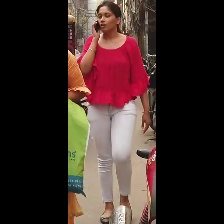

In [23]:
cv2_imshow(images[0])

In [24]:
images[0].shape

(224, 224, 3)

In [25]:
len(images)

8

In [0]:
from models.custom_model_builder import get_custom_model

In [27]:
model = get_custom_model(input_shape=(224, 224, 3))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [28]:
model

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
from keras.optimizers import SGD
losses = {
    "gender_output": "binary_crossentropy",
    "image_quality_output": "categorical_crossentropy",
    "age_output": "categorical_crossentropy",
    "weight_output": "categorical_crossentropy",
    "bag_output": "categorical_crossentropy",
    "footwear_output": "categorical_crossentropy", 
    "pose_output": "categorical_crossentropy", 
    "emotion_output": "categorical_crossentropy"
} 

loss_weights = {
    "gender_output": 1.0,
    "image_quality_output": 1.0,
    "age_output": 1.0,
    "weight_output": 1.0,
    "bag_output": 1.0,
    "footwear_output": 1.0, 
    "pose_output": 1.0, 
    "emotion_output": 1.0
} 

opt = SGD(lr=0.001, momentum=0.9)

model.compile(
    optimizer = opt,
    loss = losses, 
    loss_weights = loss_weights, 
    metrics=['val_acc']
)

In [0]:
from feature_scripts.cyclic_lr import LRFinder, OneCycleLR

In [32]:
train_df.shape

(11537, 28)

In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

In [42]:
# Prepare model model saving directory.
save_dir = Path.join(project_dir, 'models', 'final_model')
if not Path.exists(save_dir):
    os.makedirs(save_dir)
    print('Dir created')

model_name = 'model.-{epoch:03d}-{val_loss:03f}.h5'
filepath = Path.join(save_dir, model_name)

filepath

'/content/gdrive/My Drive/Colab_projects/PersonAttribures/models/final_model/model.-{epoch:03d}-{val_loss:03f}.h5'

In [0]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

# def scheduler(epoch, lr): #Implements cyclical learning rate
#   step_size = 100000 # One triangle is completed after 100k steps. Each epoch will have around 3k steps as the batch size is just 8
#   # triangle will complete after 35 epochs and last 5 epochs will have base lr
#   iterations = epoch * 100101
#   base_lr = .01 #base learning rate
#   max_lr = .001 #max learning rate
#   cycle = np.floor(1+iterations/(2*step_size))
#   x = np.abs(iterations/step_size - 2*cycle + 1)
#   new_lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
#   print((lr, new_lr))
#   if(round(lr, 2) <= base_lr and epoch > 1):
#     return base_lr 
#   else:
#     return new_lr
def scheduler(epoch):
  lr = round(0.001 * pow(0.5, epoch//10), 10) #  halving lr every 10 epochs, we will go till
  # print ('Learning rate is : ', lr)
  return lr

lr_scheduler = LearningRateScheduler(scheduler, verbose=1)


callbacks = [checkpoint, lr_scheduler]

In [0]:
model_info = model.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    # use_multiprocessing = True,
    workers=6,
    epochs=50,
    callbacks=callbacks)

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
2884/2884 [==============================] - 841s 292ms/step - loss: 7.6700 - gender_output_loss: 0.6392 - image_quality_output_loss: 0.8989 - age_output_loss: 1.4288 - weight_output_loss: 0.9798 - bag_output_loss: 0.9099 - footwear_output_loss: 0.9628 - pose_output_loss: 0.9216 - emotion_output_loss: 0.9042 - gender_output_acc: 0.6306 - image_quality_output_acc: 0.5592 - age_output_acc: 0.3975 - weight_output_acc: 0.6365 - bag_output_acc: 0.5615 - footwear_output_acc: 0.5458 - pose_output_acc: 0.6167 - emotion_output_acc: 0.7140 - val_loss: 8.2033 - val_gender_output_loss: 0.7131 - val_image_quality_output_loss: 0.9634 - val_age_output_loss: 1.4724 - val_weight_output_loss: 1.0741 - val_bag_output_loss: 0.9481 - val_footwear_output_loss: 1.0682 - val_pose_output_loss: 0.9897 - val_emotion_output_loss: 0.9497 - val_gender_output_acc: 0.4675 - val_image_quality_output_acc: 0.5566 - val_age_output_acc: 0.4006 

In [0]:
labels = [key for key, _ in targets.items()]
labels

['gender_output',
 'image_quality_output',
 'age_output',
 'weight_output',
 'bag_output',
 'pose_output',
 'footwear_output',
 'emotion_output']

In [0]:
from visualization_scripts.plot_model_history import plot_cumulative, plot_feature_history

In [0]:
def plot_cumulative(model_history, save=False):
    # visualize
    f , ax = plt.subplots(1,2, figsize=(20,10))
    xvalues = model_history.epoch 
    # epochs = 0
    for feature in model_history.history.keys():
        # get all accuracy and losses from the history object
        values = model_history.history[feature]
        # if not epochs:
        #     epochs = len(values)
        #     xvalues = np.arange(epochs)

        if feature.endswith('loss'):
            ax[0].plot(xvalues, values, label=feature)

        elif feature.endswith('acc'):
            ax[1].plot(xvalues, values, label=feature)
    ax[0].set_title("Loss curve")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("loss")
    ax[0].legend(loc='upper right')

    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("accuracy")
    ax[1].legend(loc='upper left')
    if save:
        plt.savefig('model_'+str(uuid.uuid4())+'.jpg')
    plt.show()

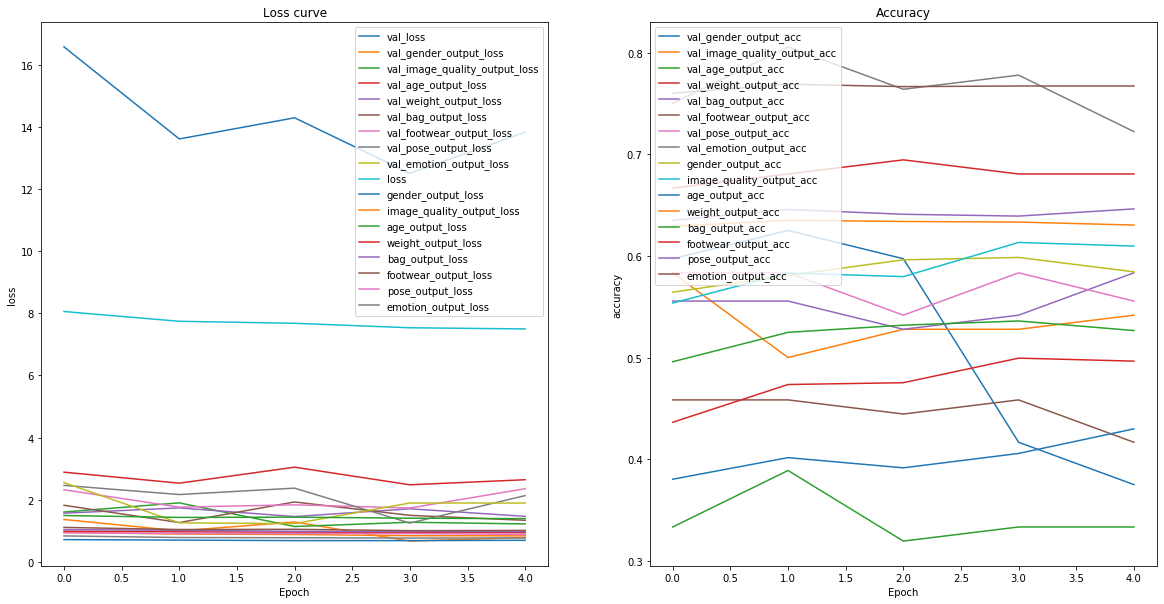

In [0]:
plot_cumulative(model_info)

In [0]:
def plot_feature_history(model_history, feature, save=False):
    """
    Plot accuracy and loss plot for a feature from history object
    """
    acc = feature + '_acc'
    val_acc = 'val_' + feature + '_acc'

    loss = feature + '_loss'
    val_loss = 'val_' + feature + '_loss'
    # visualize
    f,ax = plt.subplots(1,2, figsize=(12,6))

    # summarize history for loss
    ax[0].plot(model_history.history[loss], label='train_loss')
    ax[0].plot(model_history.history[val_loss], label='val_loss')
    ax[0].set_title(feature+'_Loss')
    ax[0].set_xlabel('epochs')
    ax[0].legend(loc='upper right')

    # summarize history for accuracy
    ax[1].plot(model_history.history[acc], label='train_acc')
    ax[1].plot(model_history.history[val_acc], label='val_acc')
    ax[1].set_title(feature+'_Accuracy')
    ax[1].set_xlabel('epochs')
    ax[1].legend(loc='upper left')
    if save:
        plt.savefig(feature+'_'+str(uuid.uuid4())+'.jpg')
    plt.show()


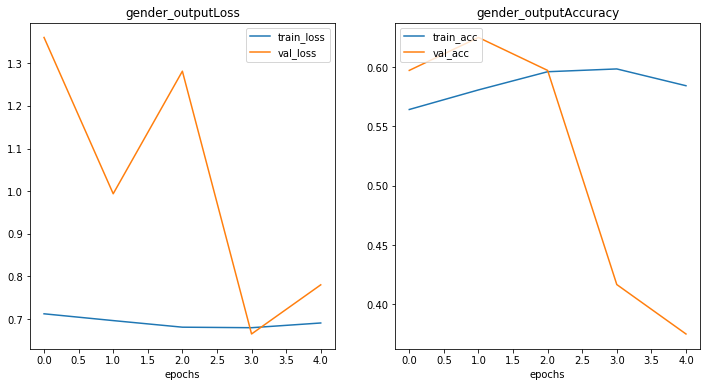

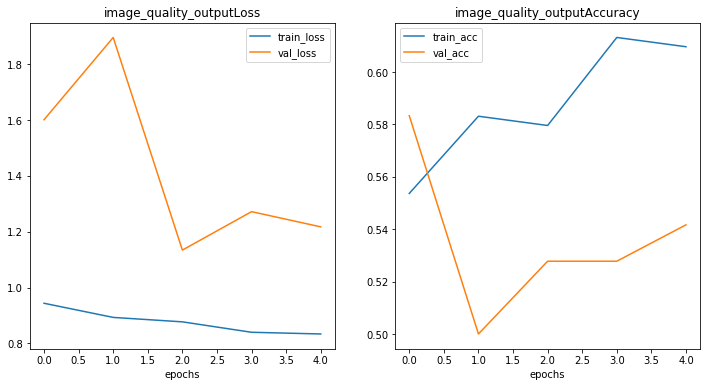

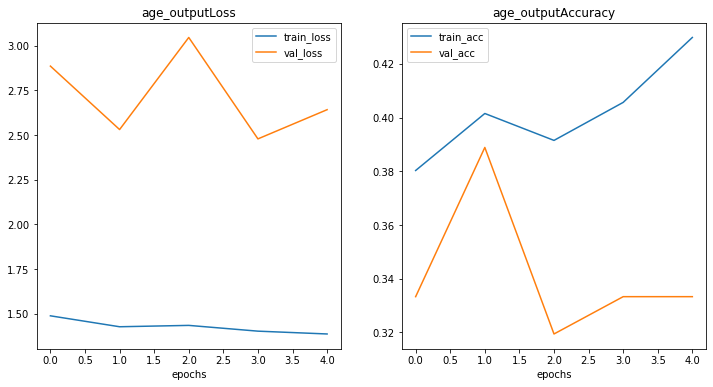

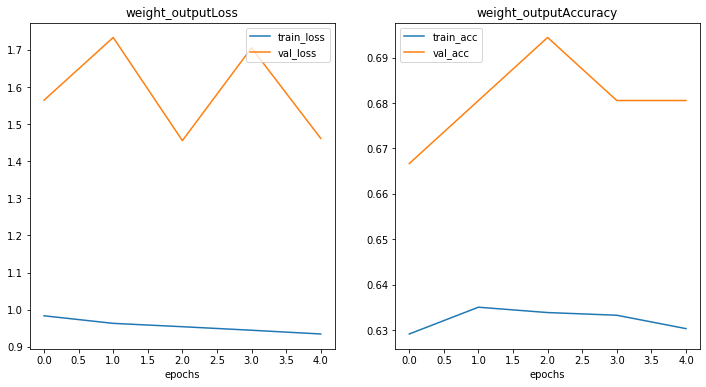

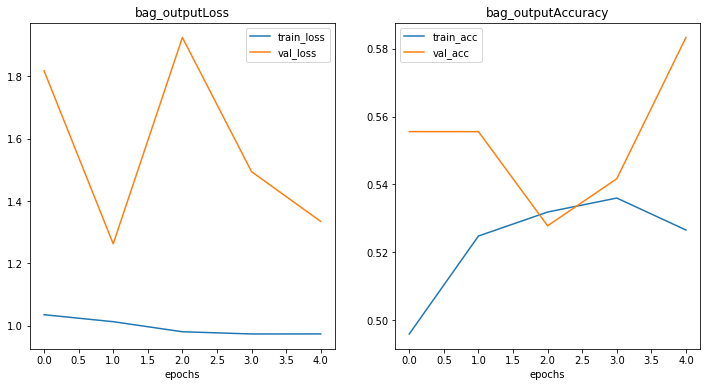

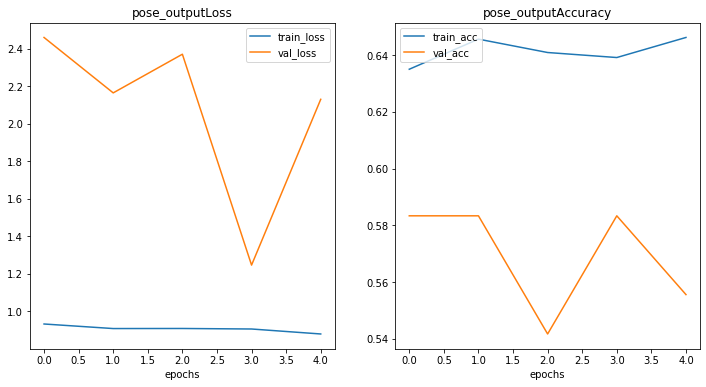

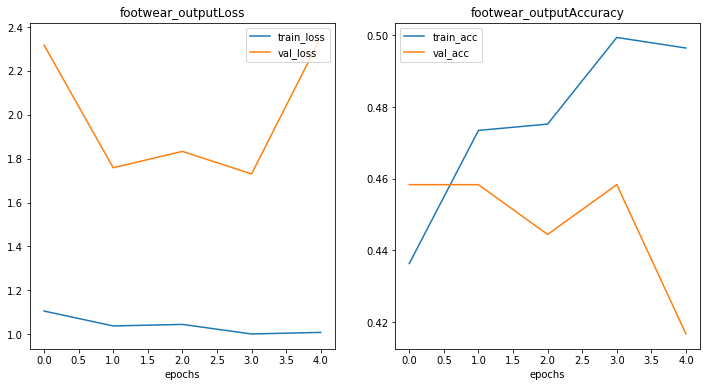

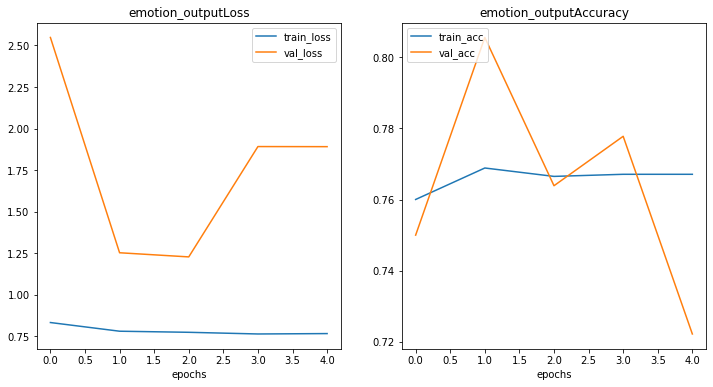

In [0]:
for label in labels:
    plot_feature_history(model_info, label)
    
 

In [0]:
results = model.evaluate_generator(valid_gen, verbose=1)
dict(zip(model.metrics_names, results))

ValueError: ignored

In [0]:
project_dir


'/content/gdrive/My Drive/Colab_projects/PersonAttribures'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
def lr_schedule(epoch):
  lr = round(0.003 * pow(0.5, epoch//5), 10) #  halving lr every 5 epochs
  print ('Learning rate is : ', lr)
  return lr

# Prepare model model saving directory.
save_dir = Path.join(project_dir, 'models', 'saved_models')
model_name = 'train_1_model.{epoch:03d}.h5'
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir, exist_ok=True)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)


lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

In [0]:
model_info = model.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    use_multiprocessing=True,
    workers=6, 
    epochs=30,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/30
Learning rate is :  0.003
212/212 [==============================] - 64s 300ms/step - loss: 7.2636 - gender_output_loss: 0.6337 - image_quality_output_loss: 0.8014 - age_output_loss: 1.3630 - weight_output_loss: 0.9153 - bag_output_loss: 0.9438 - footwear_output_loss: 0.9771 - pose_output_loss: 0.8601 - emotion_output_loss: 0.7444 - gender_output_acc: 0.6474 - image_quality_output_acc: 0.6274 - age_output_acc: 0.4175 - weight_output_acc: 0.6362 - bag_output_acc: 0.5430 - footwear_output_acc: 0.4971 - pose_output_acc: 0.6392 - emotion_output_acc: 0.7689 - val_loss: 16.3844 - val_gender_output_loss: 1.7435 - val_image_quality_output_loss: 2.2454 - val_age_output_loss: 2.4986 - val_weight_output_loss: 1.4230 - val_bag_output_loss: 1.7632 - val_footwear_output_loss: 2.1905 - val_pose_output_loss: 2.1893 - val_emotion_output_loss: 2.3061 - val_gender_output_acc: 0.3750 - val_image_quality_output_acc: 0.5000 - val_age_output_acc: 0.3611 - val_weight_output_acc: 0.6667 - val_bag_ou

In [0]:
plot_cumulative(model_info)

In [0]:
results = model.evaluate_generator(valid_gen, verbose=1)
dict(zip(model.metrics_names, results))